In [10]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [ ]:
import os
import io
import re
import nltk
import gzip
import spacy
import string
import random
import secrets
import datetime
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
import plotly.io as pio
from sklearn import tree
from typing import Counter
import plotly.express as px
# from fuzzywuzzy import fuzz
from joblib import dump, load
from bs4 import BeautifulSoup
# import category_encoders as ce
# from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import plotly.graph_objects as go
import plotly.graph_objects as go
from sklearn.cluster import KMeans
# from textblob import TextBlob, Word
from scipy.cluster import hierarchy
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from scipy.spatial.distance import pdist, squareform
# from textblob_fr import PatternTagger, PatternAnalyzer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from flask import Flask, request, render_template, session, url_for, redirect
from sklearn.preprocessing import (MaxAbsScaler, MinMaxScaler, Normalizer, PowerTransformer, QuantileTransformer, RobustScaler, StandardScaler)
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder


In [2]:
#  Charger les données   ('test.csv', sep=',', dtype={'a': str})
mobilis = pd.read_csv("data_mobilis/Data_Planier_Export.csv")
# Afficher le jeu de données Titanic
print(mobilis)

# with open("data_mobilis/Data_Planier_Export.csv", 'rb') as f:
#     contents = f.read()

# data = pd.read_csv(io.StringIO(contents.decode('utf-8')))
# print(data)
pd


     Timestamp (UTC+0)  humidity_digital_Avg  pressure_digital_Avg  \
0     2024-01-23 09:50                 72.70                  1033   
1     2024-01-23 09:40                 71.89                  1033   
2     2024-01-23 09:30                 72.29                  1033   
3     2024-01-23 09:20                 72.07                  1032   
4     2024-01-23 09:10                 72.80                  1032   
...                ...                   ...                   ...   
3154  2024-01-01 11:40                 73.26                  1018   
3155  2024-01-01 11:30                 72.69                  1018   
3156  2024-01-01 11:20                 70.97                  1018   
3157  2024-01-01 11:10                 70.80                  1018   
3158  2024-01-01 11:00                 71.50                  1018   

      temperature_digital_Avg  wind_direction_digital  wind_speed_digital  
0                       12.45                   285.9               21.94  
1      

<module 'pandas' from 'c:\\ProgramData\\Anaconda3\\Lib\\site-packages\\pandas\\__init__.py'>

In [3]:
mobilis


,Timestamp (UTC+0),humidity_digital_Avg,pressure_digital_Avg,temperature_digital_Avg,wind_direction_digital,wind_speed_digital
0,2024-01-23 09:50,72.70,1033,12.45,285.9,21.94
1,2024-01-23 09:40,71.89,1033,12.50,285.5,22.37
2,2024-01-23 09:30,72.29,1033,12.36,284.4,22.05
3,2024-01-23 09:20,72.07,1032,12.45,286.0,22.22
4,2024-01-23 09:10,72.80,1032,12.43,287.6,23.25
...,...,...,...,...,...,...
3154,2024-01-01 11:40,73.26,1018,11.14,293.2,17.46
3155,2024-01-01 11:30,72.69,1018,11.18,298.6,16.98
3156,2024-01-01 11:20,70.97,1018,11.19,305.0,17.12
3157,2024-01-01 11:10,70.80,1018,11.04,305.6,16.24


In [ ]:
df=mobilis
df["Timestamp (UTC+0)"]


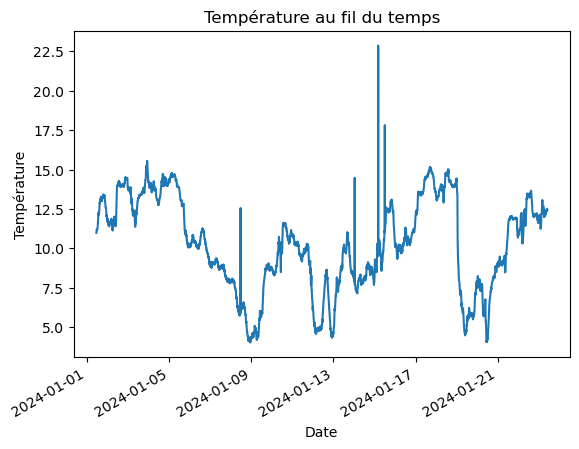

In [32]:
import matplotlib.pyplot as plt

# Assurez-vous que 'date' est de type datetime
df['Timestamp (UTC+0)'] = pd.to_datetime(df['Timestamp (UTC+0)'])

df.set_index('Timestamp (UTC+0)', inplace=True)

df['temperature_digital_Avg'].plot()
plt.title('Température au fil du temps')
plt.xlabel('Date')
plt.ylabel('Température')
plt.show()


In [6]:
df = pd.read_csv("data_mobilis/Data_Planier_Export.csv")


In [7]:
# Assurez-vous que la colonne 'date' est de type datetime
df['Timestamp (UTC+0)'] = pd.to_datetime(df['Timestamp (UTC+0)'])

# Créez un masque pour le 20 janvier
mask = (df['Timestamp (UTC+0)'].dt.day == 20) & (df['Timestamp (UTC+0)'].dt.month == 1)

# Appliquez le masque pour obtenir les données du 20 janvier
df_jan_20 = df[mask]

print(f"df_jan_20.mean()  {df_jan_20}  ")


df_jan_20.mean()        Timestamp (UTC+0)  humidity_digital_Avg  pressure_digital_Avg  \
348 2024-01-20 23:50:00                 67.26                  1031   
349 2024-01-20 23:40:00                 69.46                  1031   
350 2024-01-20 23:30:00                 69.63                  1031   
351 2024-01-20 23:20:00                 66.91                  1031   
352 2024-01-20 23:10:00                 67.83                  1031   
..                  ...                   ...                   ...   
487 2024-01-20 00:40:00                 70.06                  1014   
488 2024-01-20 00:30:00                 69.99                  1014   
489 2024-01-20 00:20:00                 70.57                  1014   
490 2024-01-20 00:10:00                 70.29                  1014   
491 2024-01-20 00:00:00                 70.91                  1014   

     temperature_digital_Avg  wind_direction_digital  wind_speed_digital  
348                    8.850                   53.15  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp (UTC+0)        3159 non-null   object 
 1   humidity_digital_Avg     3159 non-null   float64
 2   pressure_digital_Avg     3159 non-null   int64  
 3   temperature_digital_Avg  3159 non-null   float64
 4   wind_direction_digital   3159 non-null   float64
 5   wind_speed_digital       3159 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 148.2+ KB

 info :
None 

Timestamp (UTC+0)  humidity_digital_Avg  pressure_digital_Avg  temperature_digital_Avg  wind_direction_digital  wind_speed_digital
2024-01-01 11:00   71.50                 1018                  10.980                   299.5                   15.81                 1
2024-01-16 01:10   72.65                 1008                  10.220                   334.7                   18.

0       2024-01-23 09:50
1       2024-01-23 09:40
2       2024-01-23 09:30
3       2024-01-23 09:20
4       2024-01-23 09:10
              ...       
3154    2024-01-01 11:40
3155    2024-01-01 11:30
3156    2024-01-01 11:20
3157    2024-01-01 11:10
3158    2024-01-01 11:00
Name: Timestamp (UTC+0), Length: 3159, dtype: object

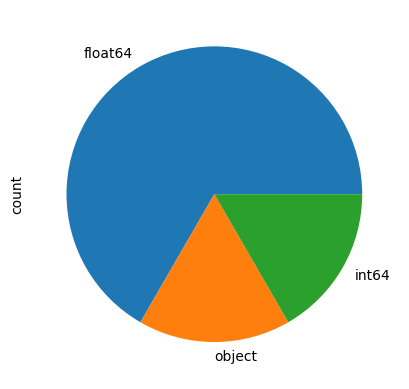

In [8]:
your_dataframe=mobilis
df=mobilis
pd.set_option('display.max_row' ,111)
print(f"\n info :\n{df.info()} \n")
df.value_counts()
print(df.value_counts())
your_dataframe.dtypes.value_counts().plot.pie()
df["Timestamp (UTC+0)"]


In [11]:

plt.figure(figsize =(20,10))
sns.histplot(df[['Age','Sex','Survived']].dropna().corr())
sns.displot(df[['Age','Sex','Survived']], label='Survived')
sns.clustermap(df[['Age','Sex','Survived']].dropna().corr())
sns.countplot(df[['Age','Sex','Survived']].dropna().corr())


KeyError: "None of [Index(['Age', 'Sex', 'Survived'], dtype='object')] are in the [columns]"

<Figure size 2000x1000 with 0 Axes>

In [5]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder

df=mobilis
df['Sex'].replace({'male':0, 'female':1}, inplace=True)
colonne_texte=df.select_dtypes('object').columns
colonne_numerique=df.select_dtypes(include=['float','int64']).columns
print(f"\n colonne_texte:\n{colonne_texte} \n")
print(f"\n colonne_numerique\n{colonne_numerique} \n")
# standaridisation avec onehotencoder
preprocessing_onehotencoder=OneHotEncoder(handle_unknown='ignore')
preprocessing_onehotencoder.fit_transform(df[colonne_texte])
print(f"\n colonne_texte:\n{df.head(5)} \n")
print(f"\n colonne_texte:\n{preprocessing_onehotencoder} \n")


KeyError: 'Sex'

In [17]:
for col in df.select_dtypes(include=['float64','int64']):
    print(f"Moyenne {col:-<60}  {df[col].mean():.2f} ")


Moyenne humidity_digital_Avg----------------------------------------  76.08 
Moyenne pressure_digital_Avg----------------------------------------  1014.34 
Moyenne temperature_digital_Avg-------------------------------------  10.25 
Moyenne wind_direction_digital--------------------------------------  242.70 
Moyenne wind_speed_digital------------------------------------------  14.77 
